In [ ]:
import networkx as nx 
import matplotlib.pyplot as plt 
import random
import numpy
from collections import defaultdict 
import sys
sys.setrecursionlimit(1500)
import time

In [ ]:
def get_AdjMatrix(n, qty_edge_required):
  adjMatrix = numpy.zeros((n, n))
  qty_edge = 0
  while qty_edge < qty_edge_required:
    i = numpy.random.randint(0, n)
    j = numpy.random.randint(0, n)
    if i != j and adjMatrix[i][j] == 0:
      adjMatrix[i][j] = 1
      adjMatrix[j][i] = 1
      qty_edge += 1
  return adjMatrix

def convert(adjMatrix): 
    adjList = defaultdict(list) 
    for i in range(len(adjMatrix)): 
      for j in range(len(adjMatrix[i])): 
        if adjMatrix[i][j]== 1: 
            temp = "{0}".format(j)
            adjList["{0}".format(i)].append(temp) 
    return adjList

def dfs(visited, graph, node):
    if node not in visited:
      print(node, end = "->")
      visited.append(node)
      for neighbour in graph[node]:
        dfs(visited, graph, neighbour)
    return visited

def test_connected1(visited, qnty_nodes):
  if len(visited) == qnty_nodes:
    print("\n","Graph is connected")
  else:
    print("\n","Graph is not connected")

def test_connected(qnty_nodes, graph, node):
    iteration = 1
    visited = [node]
    stack = [node]
    while stack:
        iteration += 1
        node = stack[-1]
        if node not in visited:
            visited.extend(node)
        remove_from_stack = True
        for next in graph[node]:
            if next not in visited:
                stack.extend(next)
                remove_from_stack = False
                break
        if remove_from_stack:
            stack.pop()
    if len(visited) == qnty_nodes:
      result = "Graph is connected"
    else:
      result = "Graph is not connected"
    return result, visited, iteration

def short_path(graph, start, end):
  # maintain a queue of paths
  queue = []
  # push the first path into the queue
  queue.append([start])
  try:
    while queue:
        # get the first path from the queue
        path = queue.pop(0)
        # get the last node from the path
        node = path[-1]
        # path found
        if node == end:
            return path
        # enumerate all adjacent nodes, construct a new path and push it into the queue
        for adjacent in graph.get(node, []):
            new_path = list(path)
            new_path.append(adjacent)
            queue.append(new_path)
  except:
   result = ("not exist")
   return result

def get_atlas():
  D = nx.graph_atlas(10)  # or MultiGraph, etc
  D.add_edge(0, 6)
  D.add_edge(2, 6)
  D.add_edge(3, 7)
  D.add_edge(4, 8)
  D.add_edge(5, 9)
  D.add_edge(9, 2)
  D.add_edge(4, 1)
  return D

The first ten column of the matrix: 
 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] 

The adjective list: 

0: ['4', '14', '22', '26']
1: ['46', '48']
2: ['22', '27', '58', '86']
3: ['94']
4: ['0', '12', '28', '38', '79', '83']
5: ['41', '54', '56', '61', '77', '81']
6: ['20', '43', '78', '97']
7: ['26', '27', '41']
8: ['19', '35', '93']
9: ['47']
2->22->0->4->12->42->15->11->32->39->18->33->74->16->21->26->7->27->92->24->84->71->47->9->36->55->48->1->46->38->10->49->14->37->77->5->41->56->57->76->43->6->20->13->17->59->28->88->23->93->8->19->61->82->34->30->40->54->58->66->81->45->64->51->44->52->63->83->35->80->87->72->73->29->65->78->95->70->75->60->86->85->90->99->94->3->98->50->53->68->31->96->91->97-

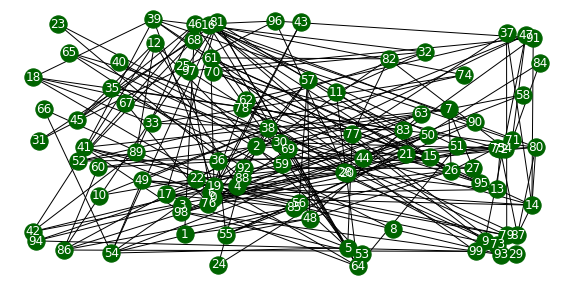

In [ ]:
# Main cell
  n = 100
  qty_edge_required = 200
  adjMatrix = get_AdjMatrix(n, qty_edge_required)
  print("The first ten column of the matrix:","\n",adjMatrix[:10, :10], "\n")
  adjList = convert(adjMatrix)
  print("The adjective list:","\n")
  for i in range(10):
    temp = "{}".format(i)
    print ("{0}: {1}".format(i, adjList[temp]))
# DFS
start = "2"
end = "8"
visited = []
#dfs1(visited, graph1, "2")
test_connected1(dfs(visited, adjList, start), n)
#print(
#    "Result of test connected of the graph: ", test_connected(n, adjList, start)[0], "\n"
#    "Path of DFS traveling from {0}: ".format(start), test_connected(n, adjList, start)[1], "\n"
#    "Iterations: ", test_connected(n, adjList, start)[2], "\n"
#    )
# BFS
print( "Shortest path between {0} and {1} is ".format(start, end),short_path(adjList, start, end))
#Picture
G = nx.Graph(adjMatrix)
pos = nx.random_layout(G)
plt.figure(3,figsize=(10,5))
labels = {}
for k in range(n):
  labels[k] = "{0}".format(k)
nx.draw_networkx_labels(G, pos, labels, font_size=12, font_color="white")
nx.draw(G, pos, node_size = 300, node_color = "darkgreen", edge_color = "black")


In [ ]:

graph1 = {
    '1' : ['2','9'],
    '2' : ['1'],
    '3' : ['4','5','6','9'],
    '4' : ['3'],
    '5' : ['3','2'],
    '6' : ['3','7'],
    '7' : ['6','9'],
    '8' : ['8','7'],
    '9' : ['1','3','7']
}
n = 100
qty_edge_required = 200
adjMatrix = get_AdjMatrix(n, qty_edge_required)
print("The first ten column of the matrix:","\n",adjMatrix[:10, :10], "\n")
adjList = convert(adjMatrix)
print("The adjective list:","\n",adjList, "\n")
visited = []
#dfs1(visited, graph1, "2")
test_connected1(dfs1(visited, adjList, "2"), n)
#plt.figure(3,figsize=(10))
#print (bfs(graph1, '1')
G = nx.Graph(adjMatrix)
pos = nx.random_layout(G)
plt.figure(3,figsize=(15,10))
labels = {}
for k in range(n):
  labels[k] = "{0}".format(k)
nx.draw_networkx_labels(G, pos, labels, font_size=12, font_color="white")
nx.draw(G, pos, node_size = 300, node_color = "darkgreen", edge_color = "black")


In [ ]:
/graph = {1: [5, 5], 2: [5], 3: [3]}
temp = []
for i in range(1, 4):
  temp.append("{0}".format(i))
  graph.update({i: temp})
print(graph)

{1: ['1', '2', '3'], 2: ['1', '2', '3'], 3: ['1', '2', '3']}


In [1]:
import numpy as np
from sklearn.manifold import TSNE
X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(4, 2)